In [2]:
from models.FC_models import *

In [26]:
PATCH_SIZE = 8

model_path = "saved_models/mikmik_fc_res-p8_b16-1_100.pkl"
model = Residual2CoreFC(coded_size=16,
                        patch_size=PATCH_SIZE,
                        num_passes=4)
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

# Train set

In [40]:
import torchvision
import torchvision.transforms as transforms

# Normalize function so given an image of range [0, 1] transforms it into a Tensor range [-1. 1]
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR LOADER
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2)

dataiter = iter(train_loader)

Files already downloaded and verified


In [71]:


from evaluation import to_patches, reconstruct_patches

imgs, labels = next(dataiter)
print(labels[0])

patches = to_patches(imgs, PATCH_SIZE)
r_patches = []
model.sample(patches[0])

r_patches = [model.sample(p) for p in patches] # Reconstructed Patches

reconstructed = reconstruct_patches(r_patches)

tensor(60)


In [65]:
import numpy as np

def imsave(img, name, path, saving_path=None):
    img = img / 2 + 0.5     # unnormalize
    #saving_path = os.path.join(args.output_path, name+'.png')
    print(f"saving to {saving_path }")
    torchvision.utils.save_image(img, saving_path)

def imshow(img, name, ax=None):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    if ax:
        ax.imshow(np.transpose(npimg, (1, 2, 0)))
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


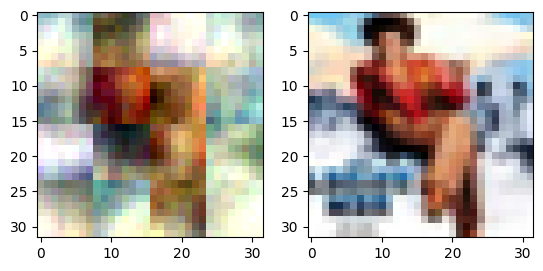

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt

# show image alongside original
f, axarr = plt.subplots(1, 2)
imshow(reconstructed[0], "reconstructed", ax=axarr[0])
imshow(imgs[0], "original", ax=axarr[1])